In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import math
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\Dell\Downloads\diamonds_new (1).csv')

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [6]:
data[['cut', 'color', 'clarity']]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [7]:
data.shape

(53940, 9)

In [8]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [9]:
zero_index = data[(data['x']==0) | (data['y']==0) | (data['z']==0)]

In [10]:
zero_index

,carat,cut,color,clarity,table,x,y,z,price_new
11182,1.07,Ideal,F,SI2,56.0,0.0,6.62,0.0,2477.0
11963,1.00,Very Good,H,VS2,53.0,0.0,0.00,0.0,2569.5
15951,1.14,Fair,G,VS1,67.0,0.0,0.00,0.0,3190.5
24520,1.56,Ideal,G,VS2,54.0,0.0,0.00,0.0,6400.0
26243,1.20,Premium,D,VVS1,59.0,0.0,0.00,0.0,7843.0
27429,2.25,Premium,H,SI2,59.0,0.0,0.00,0.0,9017.0
49556,0.71,Good,F,SI2,60.0,0.0,0.00,0.0,1065.0
49557,0.71,Good,F,SI2,60.0,0.0,0.00,0.0,1065.0


In [11]:
zero_index = data[(data['x']==0) | (data['y']==0) | (data['z']==0)].index

In [12]:
zero_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [13]:
data1 =data.drop([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557])

In [14]:
data1=data.drop(zero_index)

In [15]:
data1.shape

(53932, 9)

# outliers

Text(0.5, 1.0, 'Boxplot of X')

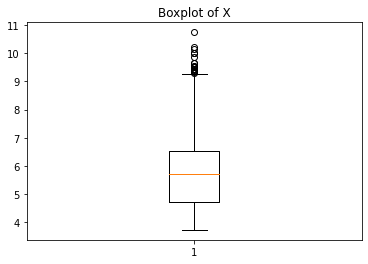

In [16]:
plt.boxplot(data1['x'])
plt.title('Boxplot of X')

Text(0.5, 1.0, 'Boxplot of y')

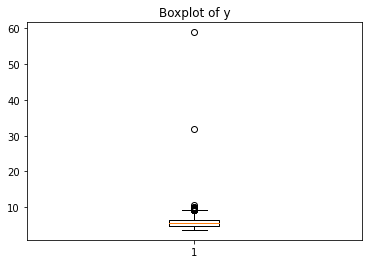

In [17]:
plt.boxplot(data1['y'])
plt.title('Boxplot of y')

Text(0.5, 1.0, 'Boxplot of Z')

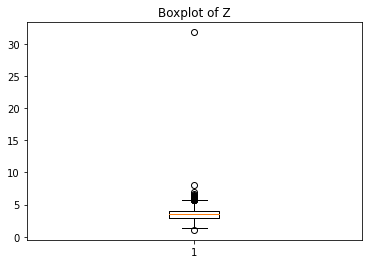

In [18]:
plt.boxplot(data1['z'])
plt.title('Boxplot of Z')

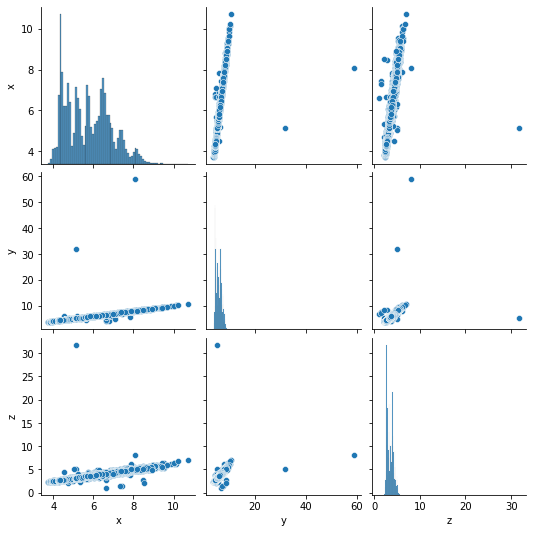

In [19]:
sns.pairplot(data1[['x','y','z']])
plt.show()

In [20]:
data1[data1['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [21]:
data1[data1['z']>30].index

Int64Index([48410], dtype='int64')

In [22]:
data2 = data1.drop([24067, 49189,48410])

In [23]:
data2.describe()

,carat,table,x,y,z,price_new
count,53830.000000,53866.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.798048,57.457669,5.731986,5.733796,3.539523,1966.026702
std,0.474385,2.235320,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


# #missing value handling

In [24]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [25]:
col=data1.columns
col

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [26]:
for col in ['carat','table', 'x', 'y', 'z','price_new']:
    data[col] = data[col].fillna(data[col].median())

In [27]:
data1.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [28]:
data= data.drop('color',axis=1)

In [29]:
data

,carat,cut,clarity,table,x,y,z,price_new
0,0.23,Ideal,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,SI2,58.0,6.15,6.12,3.74,1378.5


In [30]:
data.isna().sum()

carat        0
cut          0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# Label Encoding

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [32]:
data['cut'] =label_enc.fit_transform(data['cut'])

In [33]:
data.drop(['clarity'],axis=1,inplace=True)

In [34]:
data.head()

,carat,cut,table,x,y,z,price_new
0,0.23,2,55.0,3.95,3.98,2.43,163.0
1,0.21,3,61.0,3.89,3.84,2.31,163.0
2,0.23,1,65.0,4.05,4.07,2.31,163.5
3,0.29,3,58.0,4.20,4.23,2.63,167.0
4,0.31,1,58.0,4.34,4.35,2.75,167.5


In [35]:
data.dtypes

carat        float64
cut            int32
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [36]:
data.isna().sum()

carat        0
cut          0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# Normalization

In [37]:
X = data.drop(['price_new'],axis=1)
y = data['price_new']

In [38]:
X

,carat,cut,table,x,y,z
0,0.23,2,55.0,3.95,3.98,2.43
1,0.21,3,61.0,3.89,3.84,2.31
2,0.23,1,65.0,4.05,4.07,2.31
3,0.29,3,58.0,4.20,4.23,2.63
4,0.31,1,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,2,57.0,5.75,5.76,3.50
53936,0.72,1,55.0,5.69,5.75,3.61
53937,0.70,4,60.0,5.66,5.68,3.56
53938,0.86,3,58.0,6.15,6.12,3.74


In [39]:
X.isna().sum()

carat    0
cut      0
table    0
x        0
y        0
z        0
dtype: int64

In [40]:
X1 = X.drop('cut',axis=1)

In [41]:
X1 = preprocessing.normalize(X1)


In [42]:
type(X1)

numpy.ndarray

In [43]:
X1 = pd.DataFrame(X1,columns=['table', 'x', 'y', 'z','price_new'])

In [44]:
X1

,table,x,y,z,price_new
0,0.004156,0.993875,0.071378,0.071920,0.043911
1,0.003426,0.995296,0.063470,0.062655,0.037691
2,0.003523,0.995491,0.062027,0.062333,0.035378
3,0.004969,0.993737,0.071960,0.072474,0.045061
4,0.005309,0.993317,0.074328,0.074499,0.047097
...,...,...,...,...,...
53935,0.012481,0.988058,0.099673,0.099846,0.060670
53936,0.012923,0.987194,0.102130,0.103207,0.064796
53937,0.011543,0.989412,0.093335,0.093664,0.058705
53938,0.014633,0.986885,0.104644,0.104133,0.063637


In [45]:
X1.describe()

,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.013644,0.987834,0.098444,0.098503,0.060817
std,0.007951,0.004909,0.018400,0.018552,0.011624
min,0.003211,0.688567,0.000000,0.000000,0.000000
25%,0.006851,0.984728,0.081803,0.081976,0.050523
50%,0.012101,0.988592,0.097234,0.097305,0.060019
75%,0.018061,0.991957,0.112194,0.112133,0.069386
max,0.081474,0.999930,0.174657,0.711520,0.499299


In [46]:
X = X.drop(['table','x','y','z'],axis=1)

In [47]:
X

,carat,cut
0,0.23,2
1,0.21,3
2,0.23,1
3,0.29,3
4,0.31,1
...,...,...
53935,0.72,2
53936,0.72,1
53937,0.70,4
53938,0.86,3


In [48]:
X.isnull().sum()

carat    0
cut      0
dtype: int64

In [49]:
X=pd.concat([X,X1],axis=1)

In [50]:
X

,carat,cut,table,x,y,z,price_new
0,0.23,2,0.004156,0.993875,0.071378,0.071920,0.043911
1,0.21,3,0.003426,0.995296,0.063470,0.062655,0.037691
2,0.23,1,0.003523,0.995491,0.062027,0.062333,0.035378
3,0.29,3,0.004969,0.993737,0.071960,0.072474,0.045061
4,0.31,1,0.005309,0.993317,0.074328,0.074499,0.047097
...,...,...,...,...,...,...,...
53935,0.72,2,0.012481,0.988058,0.099673,0.099846,0.060670
53936,0.72,1,0.012923,0.987194,0.102130,0.103207,0.064796
53937,0.70,4,0.011543,0.989412,0.093335,0.093664,0.058705
53938,0.86,3,0.014633,0.986885,0.104644,0.104133,0.063637


In [51]:
X.isna().sum()

carat        0
cut          0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# TO Find mean Square Error

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [81]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error  =",mean_squared_error(y_test,predictions))
print('R Squared Value =',r2_score(y_test,predictions))

Mean Squared Error  = 568041.9881859485
R Squared Value = 0.8570677817757238


# MinMax Scaling

In [83]:
X = data.drop(['price_new'],axis=1)
y = data['price_new']

In [84]:
X.describe()

,carat,cut,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,57.457184,5.731157,5.734526,3.539635
std,0.474011,1.027708,2.234491,1.121761,1.142135,0.703869
min,0.200000,0.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,59.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,95.000000,10.740000,58.900000,31.800000


In [85]:
X2 =X.drop('cut',axis=1)

In [86]:
X2.head()

,carat,table,x,y,z
0,0.23,55.0,3.95,3.98,2.43
1,0.21,61.0,3.89,3.84,2.31
2,0.23,65.0,4.05,4.07,2.31
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75


In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [89]:
X2 = min_max_scaler.fit_transform(X2)

In [90]:
type(X2)

numpy.ndarray

In [91]:
X2 = pd.DataFrame(X2,columns=['carat','table','x','y','z'])

In [92]:
X2.describe()

,carat,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.124312,0.278023,0.533627,0.097360,0.111309
std,0.098547,0.042971,0.104447,0.019391,0.022134
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.250000,0.438547,0.080136,0.091509
50%,0.103950,0.269231,0.530726,0.096944,0.111006
75%,0.174636,0.307692,0.608939,0.111036,0.127044
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
cut = X['cut']

In [94]:
type(cut)

pandas.core.series.Series

In [95]:
X=pd.DataFrame(cut,columns=['cut'])

In [96]:
X= pd.concat([cut,X2],axis=1)

In [97]:
X.head()

,cut,carat,table,x,y,z
0,2,0.006237,0.230769,0.367784,0.067572,0.076415
1,3,0.002079,0.346154,0.362197,0.065195,0.072642
2,1,0.006237,0.423077,0.377095,0.069100,0.072642
3,3,0.018711,0.288462,0.391061,0.071817,0.082704
4,1,0.022869,0.288462,0.404097,0.073854,0.086478


In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [99]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [100]:
print("Mean Squared Error  =",mean_squared_error(y_test,predictions))
print('R Squared Value =',r2_score(y_test,predictions))

Mean Squared Error  = 568041.9881859485
R Squared Value = 0.8570677817757238


# correlation

<AxesSubplot:>

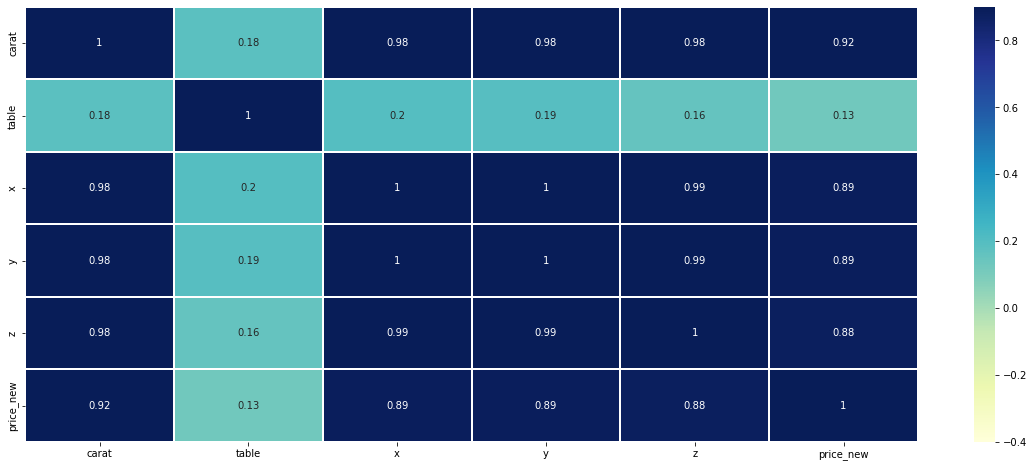

In [101]:
corr_matrix = data2.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr_matrix,vmin=-0.4,vmax=0.9,linewidth=0.2,annot=True,cmap='YlGnBu')

In [102]:
X = data.drop(['price_new'],axis=1)
y = data['price_new']

In [103]:
X2 =X.drop('cut',axis=1)

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [105]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [106]:
print("Mean Squared Error  =",mean_squared_error(y_test,predictions))
print('R Squared Value =',r2_score(y_test,predictions))

Mean Squared Error  = 568041.9881859485
R Squared Value = 0.8570677817757238
